## Install Dependencies

In [32]:
!pip3 install holidays

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import statistics
import seaborn as sns
from math import exp
import holidays

Defaulting to user installation because normal site-packages is not writeable


## Beijing Dataset

In [2]:
# Upload all datasets
Aotizhongxin = pd.read_csv("./Dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Dingling = pd.read_csv("./Dataset/PRSA_Data_Dingling_20130301-20170228.csv")
Changping = pd.read_csv("./Dataset/PRSA_Data_Changping_20130301-20170228.csv")
Dongsi = pd.read_csv("./Dataset/PRSA_Data_Dongsi_20130301-20170228.csv")
Guanyuan = pd.read_csv("./Dataset/PRSA_Data_Guanyuan_20130301-20170228.csv")
Gucheng = pd.read_csv("./Dataset/PRSA_Data_Gucheng_20130301-20170228.csv")
Huairou = pd.read_csv("./Dataset/PRSA_Data_Huairou_20130301-20170228.csv")
Nongzhanguan = pd.read_csv("./Dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
Shunyi = pd.read_csv("./Dataset/PRSA_Data_Shunyi_20130301-20170228.csv")
Tiantan = pd.read_csv("./Dataset/PRSA_Data_Tiantan_20130301-20170228.csv")
Wanliu = pd.read_csv("./Dataset/PRSA_Data_Wanliu_20130301-20170228.csv")
Wanshouxigong = pd.read_csv("./Dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [3]:
# Step 1: Combine all station DataFrames into one
combined_df = pd.concat([Aotizhongxin, Dingling, Changping, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong])

combined_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [4]:
combined_df = combined_df.drop('No', axis=1)

# Also rename the columnn name for uniformity
combined_df.rename(columns = {'year': 'Year',
                       'month': 'Month',
                       'day': "Day",
                       'hour': 'Hour',
                       'pm2.5': 'PM2.5',
                       'DEWP': 'DewP',
                       'TEMP': 'Temp',
                       'PRES': 'Press',
                       'RAIN': 'Rain',
                       'wd': 'WinDir',
                       'WSPM': 'WinSpeed',
                       'station': 'Station'}, inplace = True)
combined_df.head()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
# Map of cardinal directions to degrees
directions_to_degrees = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Convert wind directions to radians and calculate sine and cosine components
def direction_to_components(direction):
    if direction in directions_to_degrees:
        radians = np.deg2rad(directions_to_degrees[direction])
        return np.sin(radians), np.cos(radians)
    else:
        return np.nan, np.nan

# Apply the conversion to the 'WinDir' column
sin_components, cos_components = zip(*combined_df['WinDir'].map(direction_to_components))

# Add these components as new columns to the dataframe
combined_df['SinDir'] = sin_components
combined_df['CosDir'] = cos_components

combined_df.head()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station,SinDir,CosDir
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,-0.382683,0.923880
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,0.000000,1.000000
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,-0.382683,0.923880
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,-0.707107,0.707107
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,0.000000,1.000000


In [6]:
# Add wind direction in degrees

wind_direction = np.arctan2(combined_df['SinDir'], combined_df['CosDir'])
combined_df['windDirDeg'] = np.rad2deg(wind_direction)
combined_df.head()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station,SinDir,CosDir,windDirDeg
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,-0.382683,0.923880,-22.5
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,0.000000,1.000000,0.0
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,-0.382683,0.923880,-22.5
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,-0.707107,0.707107,-45.0
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,0.000000,1.000000,0.0


In [7]:
combined_df['Date'] = pd.to_datetime(combined_df[['Year', 'Month', 'Day', 'Hour']])
combined_df.head()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,...,Press,DewP,Rain,WinDir,WinSpeed,Station,SinDir,CosDir,windDirDeg,Date
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,...,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,-0.382683,0.923880,-22.5,2013-03-01 00:00:00
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,...,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,0.000000,1.000000,0.0,2013-03-01 01:00:00
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,...,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,-0.382683,0.923880,-22.5,2013-03-01 02:00:00
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,...,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,-0.707107,0.707107,-45.0,2013-03-01 03:00:00
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,...,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,0.000000,1.000000,0.0,2013-03-01 04:00:00


### Aggregate the Stations

In [8]:

# Predefined array to specify operation for each column
operations = {
    'Year': 'mode',
    'Month': 'mode',
    'Day': 'mode',
    'Hour': 'mode',
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'Temp': 'mean',
    'Press': 'mean',
    'DewP': 'mean',
    'Rain': 'mean',
    'WinDir': 'mode',
    'WinSpeed': 'mean',
    'SinDir': 'mean',
    'CosDir': 'mean',
    'windDirDeg': 'mean'
}

# Initialize lists to store aggregated values
reduced_df = {'Date': []}

# Loop over unique DateTime values
for dt in combined_df['Date'].unique():
    subset = combined_df[combined_df['Date'] == dt]
    reduced_df['Date'].append(dt)
    
    
    # Loop over columns
    for col, op in operations.items():
        result = None
        if op == 'mean':
            result = subset[col].mean()
        if op == 'mode':
            result = statistics.mode(subset[col])

        if col in reduced_df:
            reduced_df[col].append(result)
        else:
            reduced_df[col] = [result]


reduced_df = pd.DataFrame(reduced_df)

reduced_df.head()

,Date,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,SinDir,CosDir,windDirDeg
0,2013-03-01 00:00:00,2013,3,1,0,5.666667,7.916667,5.666667,12.600000,308.333333,75.416667,-0.916667,1022.766667,-19.900000,0.0,NNW,4.175000,-0.296506,0.643571,-15.000
1,2013-03-01 01:00:00,2013,3,1,1,6.833333,9.833333,5.333333,13.111111,308.333333,75.750000,-1.216667,1023.191667,-19.916667,0.0,NW,3.875000,-0.249528,0.717289,-15.000
2,2013-03-01 02:00:00,2013,3,1,2,5.666667,7.250000,8.166667,12.900000,300.000000,66.000000,-1.591667,1023.325000,-21.008333,0.0,NNW,4.400000,-0.309193,0.707352,-18.750
3,2013-03-01 03:00:00,2013,3,1,3,6.000000,9.250000,5.833333,12.400000,283.333333,75.333333,-1.891667,1024.208333,-21.833333,0.0,NW,3.366667,-0.346071,0.775598,-24.375
4,2013-03-01 04:00:00,2013,3,1,4,4.833333,6.916667,6.750000,14.000000,308.333333,66.333333,-2.283333,1024.866667,-21.625000,0.0,N,2.716667,-0.340467,0.847333,-22.500


In [9]:
print(reduced_df.shape)
Beijing_df = reduced_df.copy()

(35064, 20)


In [10]:
Beijing_df.isnull().sum()

Date            0
Year            0
Month           0
Day             0
Hour            0
PM2.5          81
PM10           83
SO2            87
NO2            87
CO            204
O3            107
Temp           18
Press          18
DewP           18
Rain           18
WinDir         82
WinSpeed       12
SinDir         12
CosDir         12
windDirDeg     12
dtype: int64

In [11]:
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'WinDir', 'WinSpeed', 'SinDir', 'CosDir', 'windDirDeg']

# Apply linear interpolation for each feature
for feature in features:
    Beijing_df[feature].interpolate(method='linear', inplace=True)

/tmp/ipykernel_4563/2763201392.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Beijing_df[feature].interpolate(method='linear', inplace=True)
/tmp/ipykernel_4563/2763201392.py:5: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Beijing_df[feature].interpolate(method='linear', inplace=True)


In [12]:
Beijing_df.isnull().sum()

Date           0
Year           0
Month          0
Day            0
Hour           0
PM2.5          0
PM10           0
SO2            0
NO2            0
CO             0
O3             0
Temp           0
Press          0
DewP           0
Rain           0
WinDir        82
WinSpeed       0
SinDir         0
CosDir         0
windDirDeg     0
dtype: int64

In [13]:
Beijing_df.head()

,Date,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,SinDir,CosDir,windDirDeg
0,2013-03-01 00:00:00,2013,3,1,0,5.666667,7.916667,5.666667,12.600000,308.333333,75.416667,-0.916667,1022.766667,-19.900000,0.0,NNW,4.175000,-0.296506,0.643571,-15.000
1,2013-03-01 01:00:00,2013,3,1,1,6.833333,9.833333,5.333333,13.111111,308.333333,75.750000,-1.216667,1023.191667,-19.916667,0.0,NW,3.875000,-0.249528,0.717289,-15.000
2,2013-03-01 02:00:00,2013,3,1,2,5.666667,7.250000,8.166667,12.900000,300.000000,66.000000,-1.591667,1023.325000,-21.008333,0.0,NNW,4.400000,-0.309193,0.707352,-18.750
3,2013-03-01 03:00:00,2013,3,1,3,6.000000,9.250000,5.833333,12.400000,283.333333,75.333333,-1.891667,1024.208333,-21.833333,0.0,NW,3.366667,-0.346071,0.775598,-24.375
4,2013-03-01 04:00:00,2013,3,1,4,4.833333,6.916667,6.750000,14.000000,308.333333,66.333333,-2.283333,1024.866667,-21.625000,0.0,N,2.716667,-0.340467,0.847333,-22.500


In [14]:
Beijing_df= Beijing_df.drop(['WinDir'],axis=1)
Beijing_df.shape

(35064, 19)

## Compute AQHI

In [15]:

# Define the function to calculate AQHI
def calculate_aqhi(row):
    o3 = row['O3']
    no2 = row['NO2']
    pm2_5 = row['PM2.5']
    # Check for NaN values and return NaN to avoid calculation errors
    if pd.isna(o3) or pd.isna(no2) or pd.isna(pm2_5):
        return float('nan')
    # Implementing the formula provided
    aqhi = (10 / 18) * 100 * ((exp(0.000871 * no2) - 1) +
                                 (exp(0.000537 * o3) - 1) +
                                 (exp(0.000487 * pm2_5) - 1))
    return aqhi

# Apply the function to calculate AQHI for each row
Beijing_df['AQHI'] = Beijing_df.apply(calculate_aqhi, axis=1)

# Display the first few rows to verify the new AQHI column
print(Beijing_df[['O3', 'NO2', 'PM2.5', 'AQHI']].head())

          O3        NO2     PM2.5      AQHI
0  75.416667  12.600000  5.666667  3.062696
1  75.750000  13.111111  6.833333  3.129724
2  66.000000  12.900000  5.666667  2.785572
3  75.333333  12.400000  6.000000  3.059368
4  66.333333  14.000000  4.833333  2.827127


# Outlier Detection

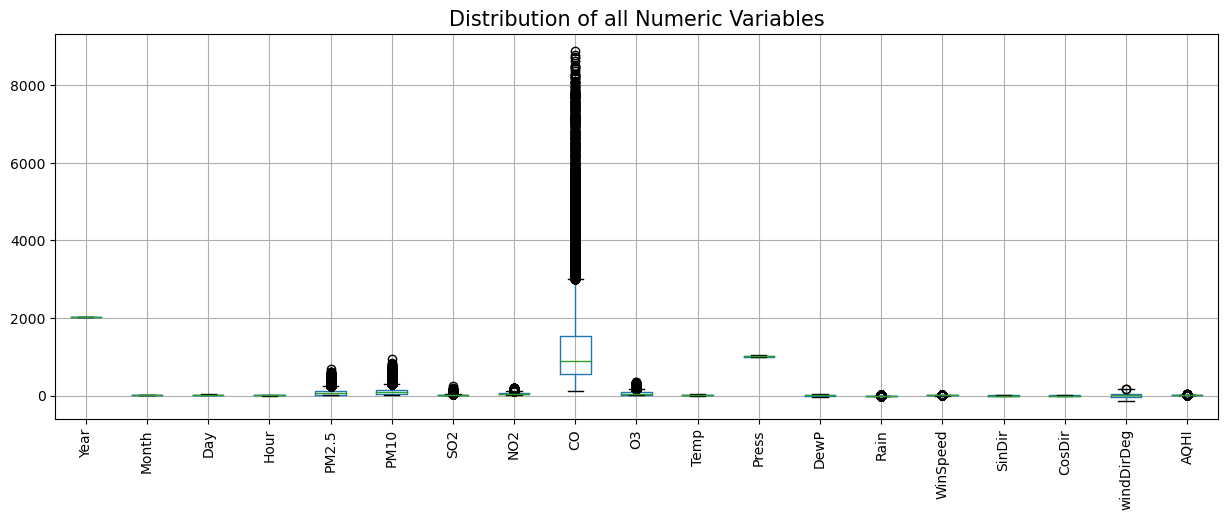

In [17]:
Beijing_df_outlier = Beijing_df.copy()
Beijing_df_outlier = Beijing_df_outlier.select_dtypes(exclude='object')
# set the plot size using figure()
plt.figure(figsize = (15,5))

# plot a boxplot to visualize the outliers in all the numeric variables
Beijing_df_outlier.boxplot()

plt.title('Distribution of all Numeric Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 10)

# display the plot
plt.show()

In [18]:
print('Before: Outliers Treating with IQR', Beijing_df.shape)

# Creating a copy of the DataFrame to work with
Beijing_df_IQR = Beijing_df.copy()

# Selecting only numeric data types for outlier detection
numeric_columns = Beijing_df_IQR.select_dtypes(include=['float64', 'int64']).columns

# Replace outliers in each column
for col in numeric_columns:
    if col != 'Rain':  # Skip 'RAIN' column for outlier replacement
        # Calculate Q1, Q3 and IQR
        Q1 = Beijing_df_IQR[col].quantile(0.25)
        Q3 = Beijing_df_IQR[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Define a mask for outliers
        outlier_mask = (Beijing_df_IQR[col] < lower_bound) | (Beijing_df_IQR[col] > upper_bound)

        # Replace outliers with NaN to ease the calculation of neighbors' mean
        Beijing_df_IQR.loc[outlier_mask, col] = np.nan

        # Interpolate missing values using mean of neighboring values
        Beijing_df_IQR[col] = Beijing_df_IQR[col].interpolate(method='linear', limit_direction='both')

print('After: Outliers Replaced with Neighbors Mean', Beijing_df_IQR.shape)

Before: Outliers Treating with IQR (35064, 20)
After: Outliers Replaced with Neighbors Mean (35064, 20)


After correcting the identified outlier, the shape remains unchanged. Removing the outlier isn't feasible since it would disrupt our time series sequence. Therefore, we identify and interpolate the outliers instead.

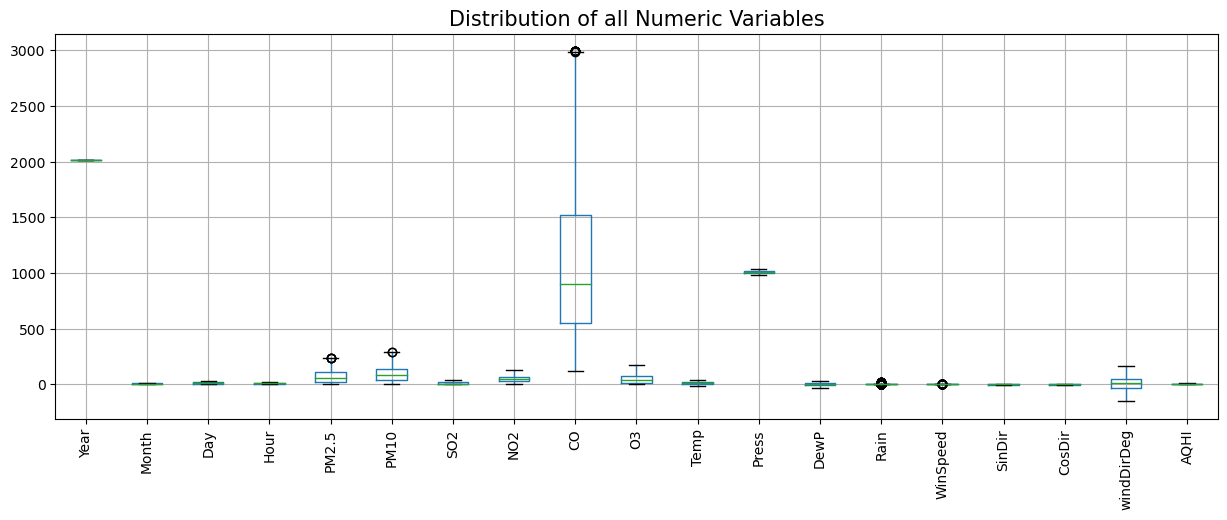

In [19]:
# set the plot size using figure()
# pass width and height in inches to 'figsize'
plt.figure(figsize = (15,5))

# plot a boxplot to visualize the outliers in all the numeric variables
Beijing_df_IQR.boxplot()

# set plot label
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
plt.xticks(rotation = 'vertical', fontsize = 10)

# display the plot
plt.show()

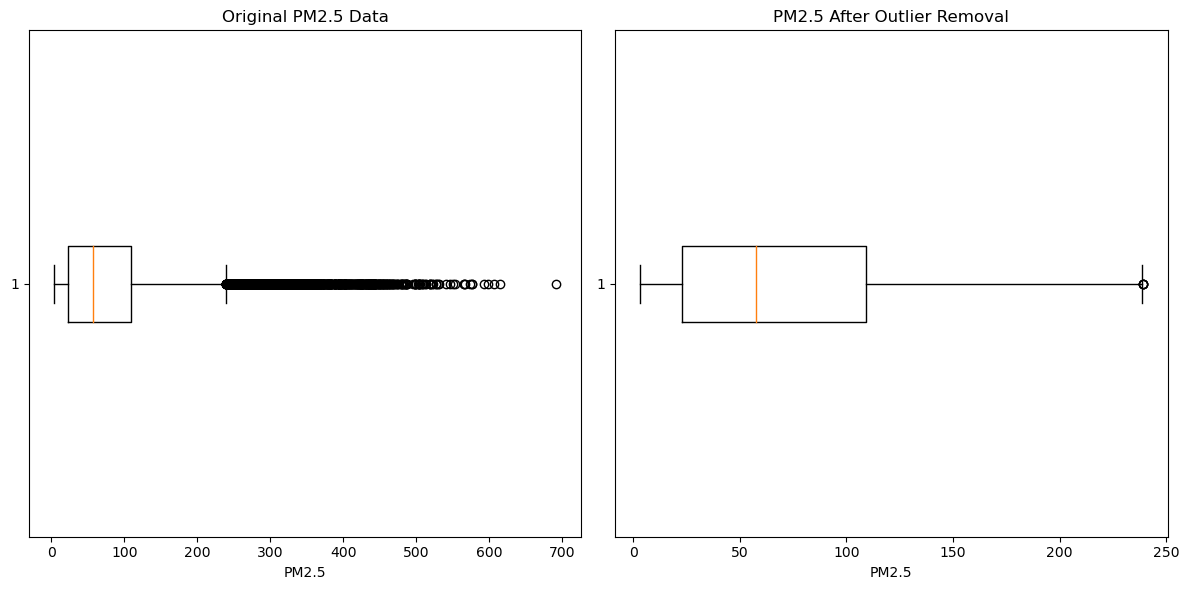

In [20]:
import matplotlib.pyplot as plt


# Selecting the 'PM2.5' column from both DataFrames for comparison
original_pm25 = Beijing_df['PM2.5']
cleaned_pm25 = Beijing_df_IQR['PM2.5']

# Creating the plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for the original data
axs[0].boxplot(original_pm25.dropna(), vert=False)  # dropna() to ignore NaN values for plotting
axs[0].set_title('Original PM2.5 Data')
axs[0].set_xlabel('PM2.5')

# Box plot for the data after outlier removal
axs[1].boxplot(cleaned_pm25.dropna(), vert=False)  # dropna() to ignore NaN values for plotting
axs[1].set_title('PM2.5 After Outlier Removal')
axs[1].set_xlabel('PM2.5')

plt.tight_layout()
plt.show()

## Add time and month cyclic normalizer

In [21]:
def cyclic_normalizer(feature_column):
    max_value = feature_column.max() + 1

    normalized_data = (feature_column / max_value) * 360
    
    # Apply cosine function
    top_bottom = np.cos(np.radians(normalized_data))
    left_right = np.sin(np.radians(normalized_data))

    
    return top_bottom, left_right

In [22]:
clean_beijing_df = Beijing_df_IQR.copy()

Hour_top_bottom, Hour_left_right = cyclic_normalizer(clean_beijing_df['Hour'])

clean_beijing_df['Hour_12_06'] = Hour_top_bottom
clean_beijing_df['Hour_03_09'] = Hour_left_right

clean_beijing_df.head()

,Date,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,...,Press,DewP,Rain,WinSpeed,SinDir,CosDir,windDirDeg,AQHI,Hour_12_06,Hour_03_09
0,2013-03-01 00:00:00,2013.0,3.0,1.0,0.0,5.666667,7.916667,5.666667,12.600000,308.333333,...,1022.766667,-19.900000,0.0,3.875000,-0.296506,0.643571,-15.000,3.062696,1.000000,0.000000
1,2013-03-01 01:00:00,2013.0,3.0,1.0,1.0,6.833333,9.833333,5.333333,13.111111,308.333333,...,1023.191667,-19.916667,0.0,3.875000,-0.249528,0.717289,-15.000,3.129724,0.965926,0.258819
2,2013-03-01 02:00:00,2013.0,3.0,1.0,2.0,5.666667,7.250000,8.166667,12.900000,300.000000,...,1023.325000,-21.008333,0.0,3.620833,-0.309193,0.707352,-18.750,2.785572,0.866025,0.500000
3,2013-03-01 03:00:00,2013.0,3.0,1.0,3.0,6.000000,9.250000,5.833333,12.400000,283.333333,...,1024.208333,-21.833333,0.0,3.366667,-0.346071,0.775598,-24.375,3.059368,0.707107,0.707107
4,2013-03-01 04:00:00,2013.0,3.0,1.0,4.0,4.833333,6.916667,6.750000,14.000000,308.333333,...,1024.866667,-21.625000,0.0,2.716667,-0.340467,0.847333,-22.500,2.827127,0.500000,0.866025


In [23]:
month_sin, month_cos = cyclic_normalizer(clean_beijing_df['Month'])

clean_beijing_df['MonthSin'] = month_sin
clean_beijing_df['MonthCos'] = month_cos

In [24]:
day_sin, day_cos = cyclic_normalizer(clean_beijing_df['Day'])

clean_beijing_df['DaySin'] = day_sin
clean_beijing_df['DayCos'] = day_cos

clean_beijing_df.head()

,Date,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,...,SinDir,CosDir,windDirDeg,AQHI,Hour_12_06,Hour_03_09,MonthSin,MonthCos,DaySin,DayCos
0,2013-03-01 00:00:00,2013.0,3.0,1.0,0.0,5.666667,7.916667,5.666667,12.600000,308.333333,...,-0.296506,0.643571,-15.000,3.062696,1.000000,0.000000,0.120537,0.992709,0.980785,0.19509
1,2013-03-01 01:00:00,2013.0,3.0,1.0,1.0,6.833333,9.833333,5.333333,13.111111,308.333333,...,-0.249528,0.717289,-15.000,3.129724,0.965926,0.258819,0.120537,0.992709,0.980785,0.19509
2,2013-03-01 02:00:00,2013.0,3.0,1.0,2.0,5.666667,7.250000,8.166667,12.900000,300.000000,...,-0.309193,0.707352,-18.750,2.785572,0.866025,0.500000,0.120537,0.992709,0.980785,0.19509
3,2013-03-01 03:00:00,2013.0,3.0,1.0,3.0,6.000000,9.250000,5.833333,12.400000,283.333333,...,-0.346071,0.775598,-24.375,3.059368,0.707107,0.707107,0.120537,0.992709,0.980785,0.19509
4,2013-03-01 04:00:00,2013.0,3.0,1.0,4.0,4.833333,6.916667,6.750000,14.000000,308.333333,...,-0.340467,0.847333,-22.500,2.827127,0.500000,0.866025,0.120537,0.992709,0.980785,0.19509


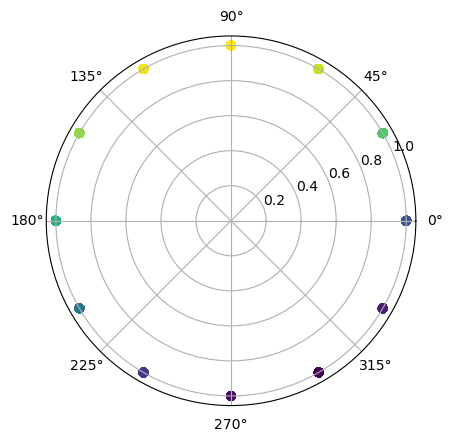

In [25]:
# Visualize
fig, ax = plt.subplots(1, 1, subplot_kw=dict(polar=True))
ax.scatter(np.deg2rad(clean_beijing_df['Month']*30), np.ones(len(clean_beijing_df)), c=month_cos)

In [28]:
clean_beijing_df_drop = clean_beijing_df.drop(columns=['Hour', 'Day', 'Month', 'Year'])

In [29]:
clean_beijing_df_drop.set_index('Date', inplace=True)

### Add weekend data and day of the week

In [30]:
clean_beijing_df_drop['Day_of_Week'] = clean_beijing_df_drop.index.dayofweek
clean_beijing_df_drop['Weekends'] = clean_beijing_df_drop['Day_of_Week'].isin([5, 6]).astype(int)

### Add holiday information

In [33]:
# Specify the years for which you want to retrieve holidays in Beijing
years = list(range(2013, 2018))

# Create a list of Chinese holidays for the specified years
chinese_holidays = holidays.CountryHoliday('CN', years=years)

# Print the list of Chinese holidays
chinese_holiday_list = list(chinese_holidays.keys())

chinese_holiday_list[0]

datetime.date(2016, 1, 1)

In [34]:
formatted_holidays = [pd.Timestamp(date) for date in chinese_holiday_list]

clean_beijing_df_drop['Is_Holiday'] = clean_beijing_df_drop.index.map(lambda date: 1 if date in formatted_holidays else 0)

clean_beijing_df_drop.head()

,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,...,AQHI,Hour_12_06,Hour_03_09,MonthSin,MonthCos,DaySin,DayCos,Day_of_Week,Weekends,Is_Holiday
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,5.666667,7.916667,5.666667,12.600000,308.333333,75.416667,-0.916667,1022.766667,-19.900000,0.0,...,3.062696,1.000000,0.000000,0.120537,0.992709,0.980785,0.19509,4,0,0
2013-03-01 01:00:00,6.833333,9.833333,5.333333,13.111111,308.333333,75.750000,-1.216667,1023.191667,-19.916667,0.0,...,3.129724,0.965926,0.258819,0.120537,0.992709,0.980785,0.19509,4,0,0
2013-03-01 02:00:00,5.666667,7.250000,8.166667,12.900000,300.000000,66.000000,-1.591667,1023.325000,-21.008333,0.0,...,2.785572,0.866025,0.500000,0.120537,0.992709,0.980785,0.19509,4,0,0
2013-03-01 03:00:00,6.000000,9.250000,5.833333,12.400000,283.333333,75.333333,-1.891667,1024.208333,-21.833333,0.0,...,3.059368,0.707107,0.707107,0.120537,0.992709,0.980785,0.19509,4,0,0
2013-03-01 04:00:00,4.833333,6.916667,6.750000,14.000000,308.333333,66.333333,-2.283333,1024.866667,-21.625000,0.0,...,2.827127,0.500000,0.866025,0.120537,0.992709,0.980785,0.19509,4,0,0


### Add information about season

In [36]:

# Define function to map month to season
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Create 'Season' column based on DateTimeIndex
clean_beijing_df_drop['Season'] = clean_beijing_df_drop.index.month.map(get_season)

# Perform one-hot encoding on 'Season' column
clean_beijing_df_drop_encoded = pd.get_dummies(clean_beijing_df_drop, columns=['Season'])

clean_beijing_df_drop_encoded.head()

,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,...,MonthCos,DaySin,DayCos,Day_of_Week,Weekends,Is_Holiday,Season_Fall,Season_Spring,Season_Summer,Season_Winter
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,5.666667,7.916667,5.666667,12.600000,308.333333,75.416667,-0.916667,1022.766667,-19.900000,0.0,...,0.992709,0.980785,0.19509,4,0,0,False,True,False,False
2013-03-01 01:00:00,6.833333,9.833333,5.333333,13.111111,308.333333,75.750000,-1.216667,1023.191667,-19.916667,0.0,...,0.992709,0.980785,0.19509,4,0,0,False,True,False,False
2013-03-01 02:00:00,5.666667,7.250000,8.166667,12.900000,300.000000,66.000000,-1.591667,1023.325000,-21.008333,0.0,...,0.992709,0.980785,0.19509,4,0,0,False,True,False,False
2013-03-01 03:00:00,6.000000,9.250000,5.833333,12.400000,283.333333,75.333333,-1.891667,1024.208333,-21.833333,0.0,...,0.992709,0.980785,0.19509,4,0,0,False,True,False,False
2013-03-01 04:00:00,4.833333,6.916667,6.750000,14.000000,308.333333,66.333333,-2.283333,1024.866667,-21.625000,0.0,...,0.992709,0.980785,0.19509,4,0,0,False,True,False,False


Is_Holiday
0    6.416485
1    6.487414
Name: AQHI, dtype: float64


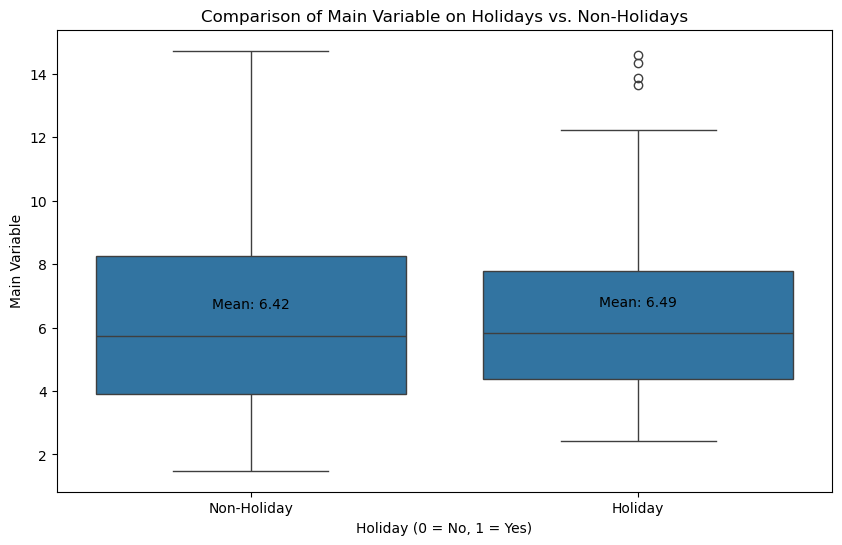

In [37]:

# Calculate mean values for holidays and non-holidays
mean_values = clean_beijing_df_drop.groupby('Is_Holiday')['AQHI'].mean()
print(mean_values)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Holiday', y='AQHI', data=clean_beijing_df_drop, showmeans=False)  # Don't show built-in means
plt.title('Comparison of Main Variable on Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Main Variable')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])

# Annotate the plot with mean values
for i, mean_value in enumerate(mean_values):
    plt.text(i, mean_value + 0.1, f'Mean: {mean_value:.2f}', ha='center', va='bottom')

plt.show()

Day_of_Week
0    6.170491
1    6.328575
2    6.351776
3    6.360747
4    6.536232
5    6.719254
6    6.448943
Name: AQHI, dtype: float64


/tmp/ipykernel_4992/3229194898.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Day_of_Week', y='AQHI', data=clean_beijing_df_drop, ci=None)


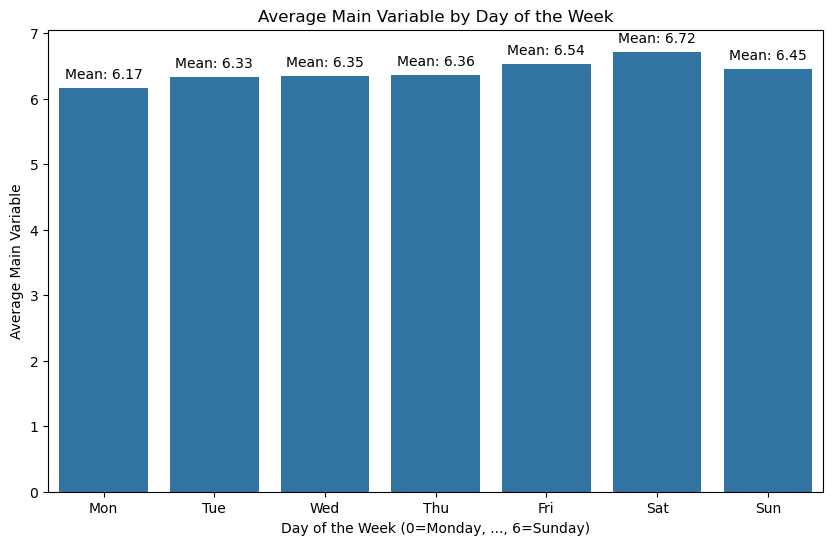

In [42]:
# Calculate mean values for each day of the week
mean_values_weekday = clean_beijing_df_drop.groupby('Day_of_Week')['AQHI'].mean()
print(mean_values_weekday)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Day_of_Week', y='AQHI', data=clean_beijing_df_drop, ci=None)
ax.set_title('Average Main Variable by Day of the Week')
ax.set_xlabel('Day of the Week (0=Monday, ..., 6=Sunday)')
ax.set_ylabel('Average Main Variable')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Annotate the bar plot with mean values
for i, mean_value in enumerate(mean_values_weekday):
    plt.text(i, mean_value + 0.1, f'Mean: {mean_value:.2f}', ha='center', va='bottom')

plt.show()

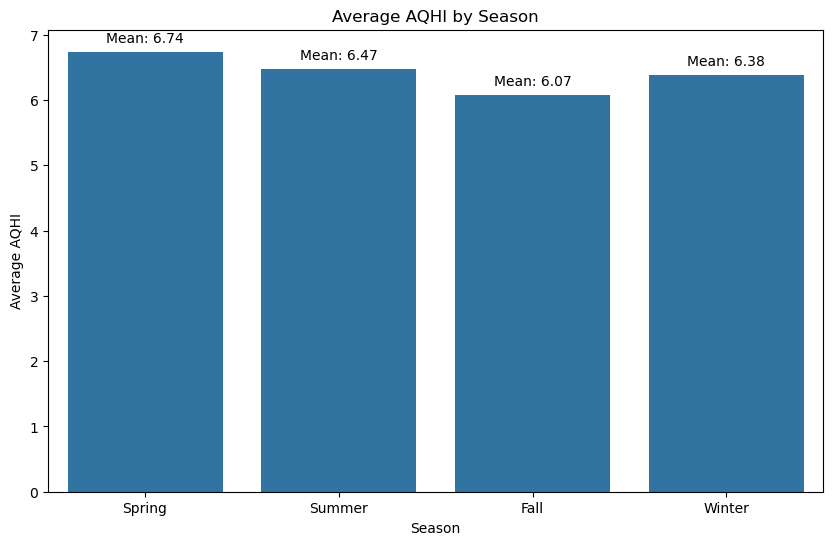

In [38]:
# Calculate mean values for each season
seasonal_data = clean_beijing_df_drop.groupby('Season')['AQHI'].mean().reindex(['Spring', 'Summer', 'Fall', 'Winter'])

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=seasonal_data.index, y=seasonal_data.values)
ax.set_title('Average AQHI by Season')
ax.set_xlabel('Season')
ax.set_ylabel('Average AQHI')

# Annotate the bar plot with mean values
for i, mean_value in enumerate(seasonal_data.values):
    plt.text(i, mean_value + 0.1, f'Mean: {mean_value:.2f}', ha='center', va='bottom')

plt.show()

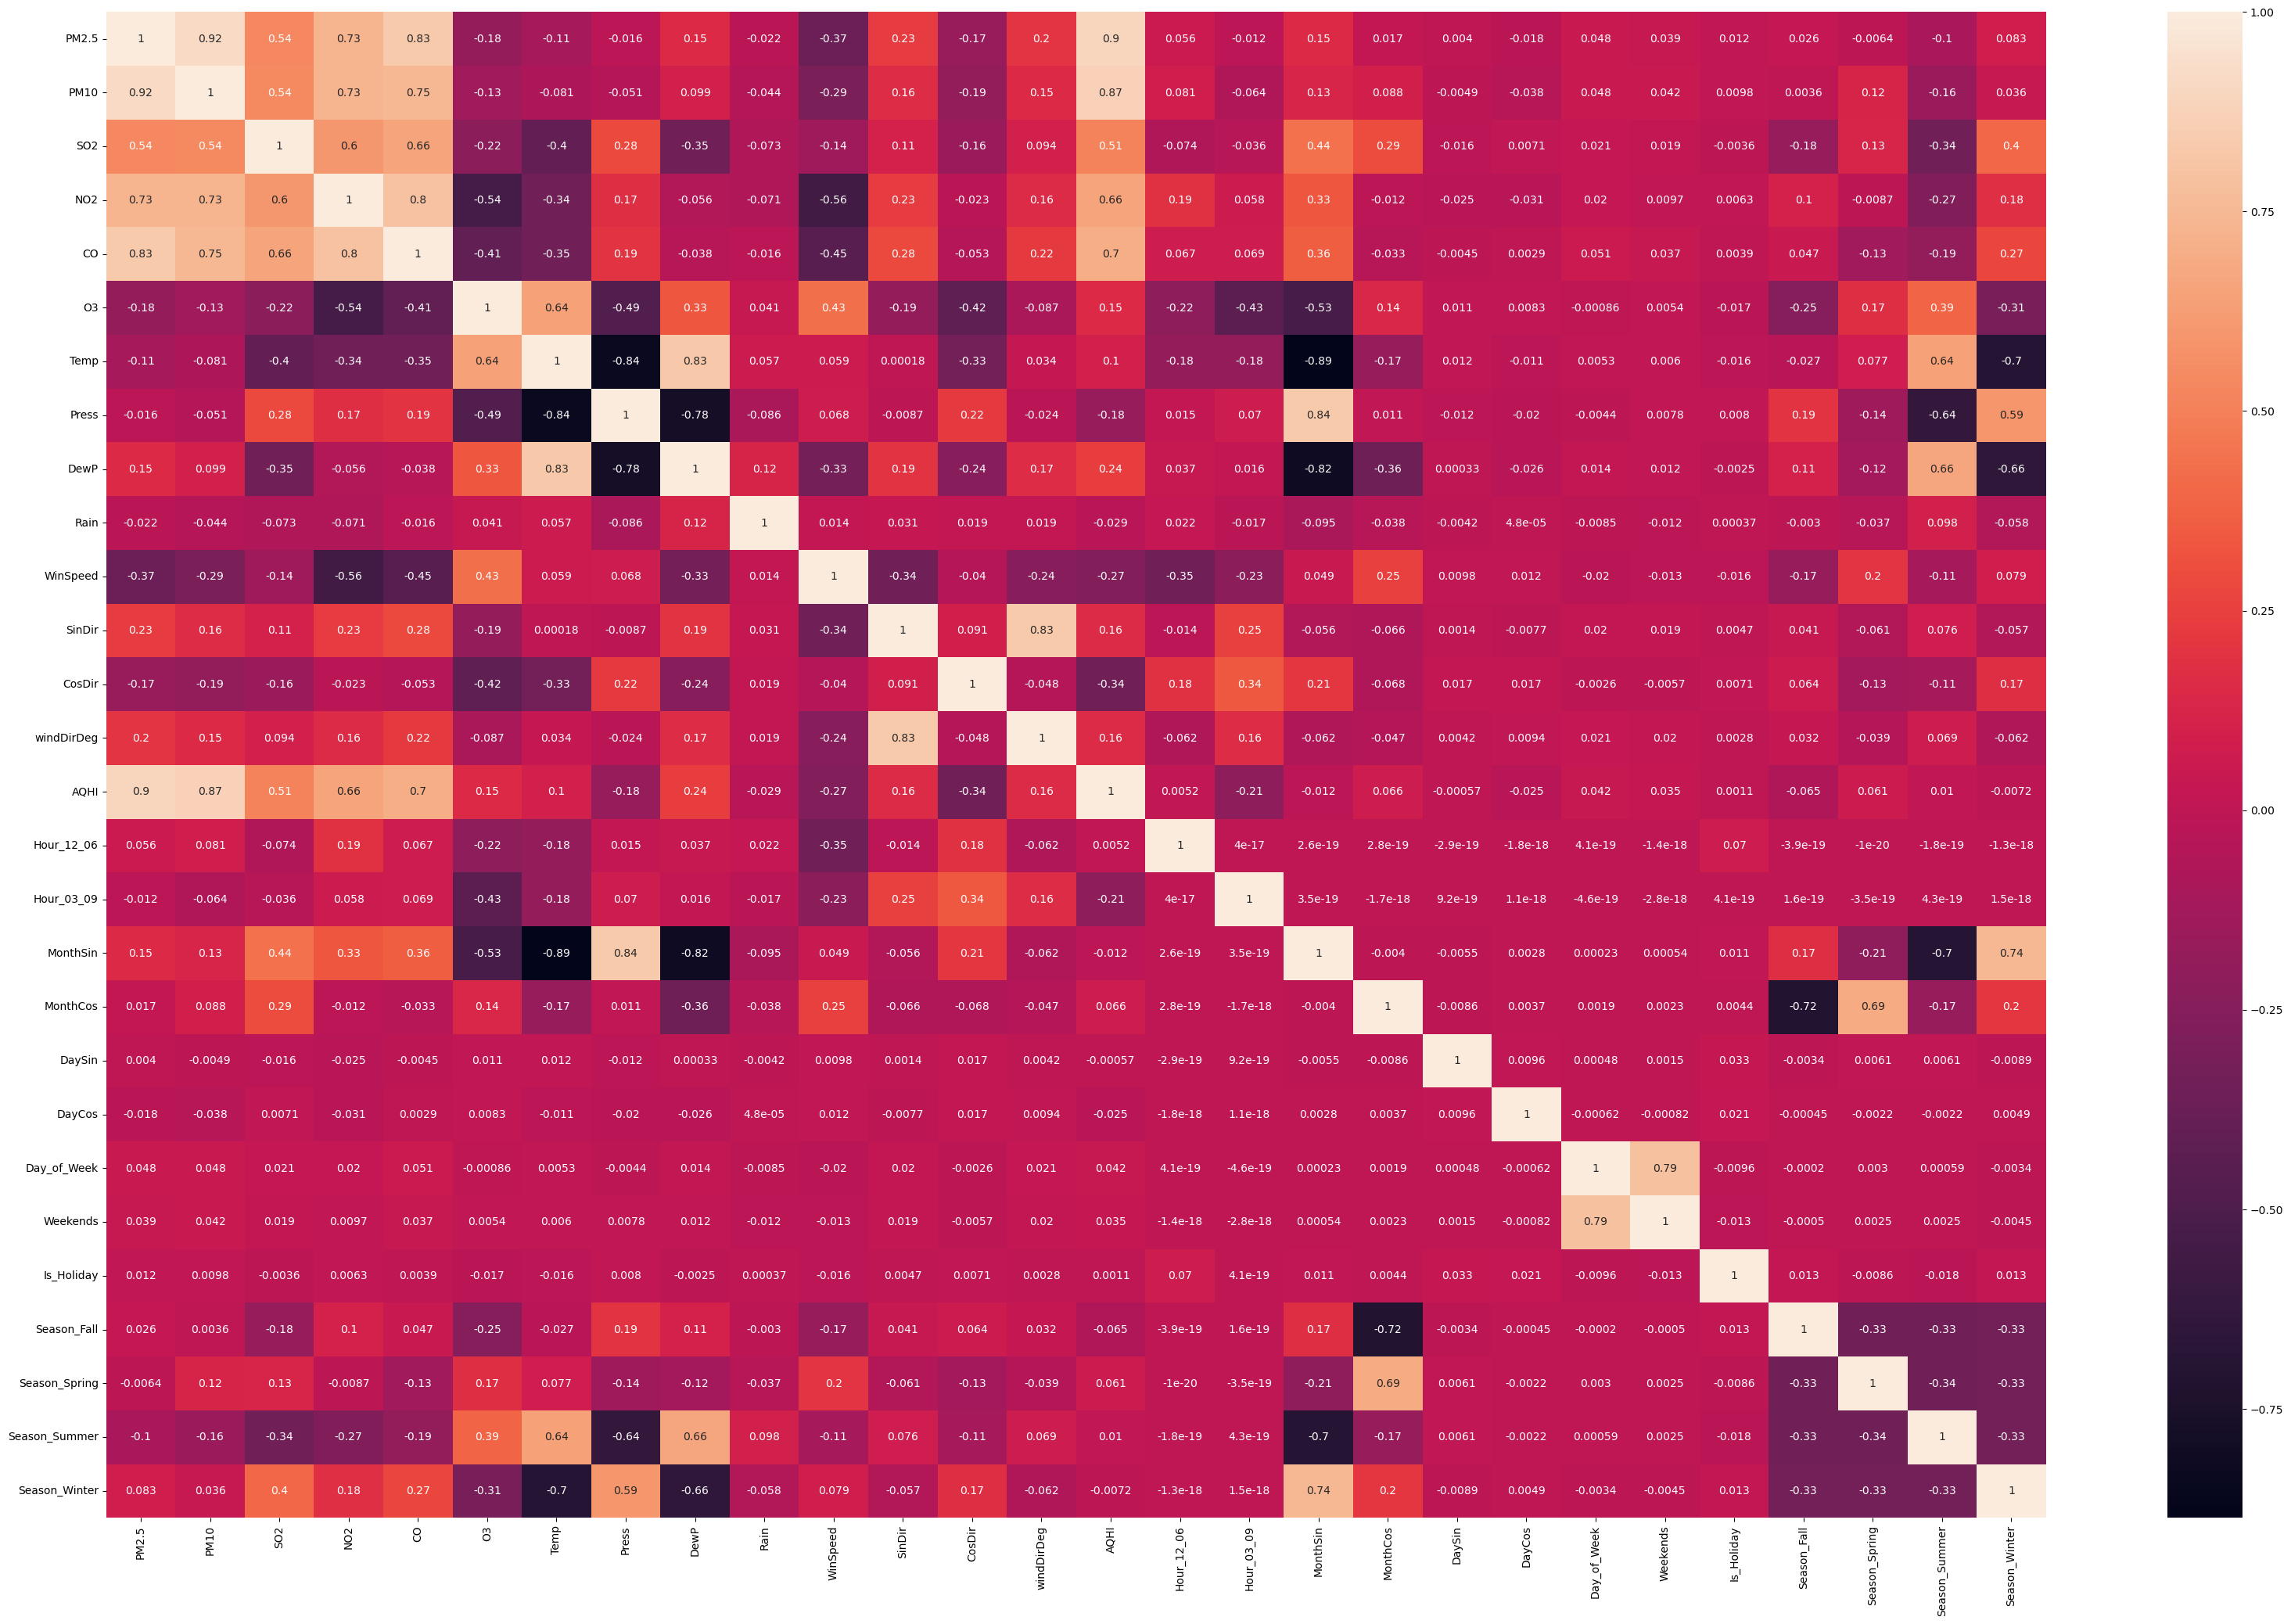

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 25))
p = sns.heatmap(clean_beijing_df_drop_encoded.corr(), annot=True)

In [40]:
beijing_correlated_df = clean_beijing_df_drop_encoded.drop(columns=['DaySin', 'DayCos', 'Day_of_Week', 'Weekends', 'Is_Holiday'])


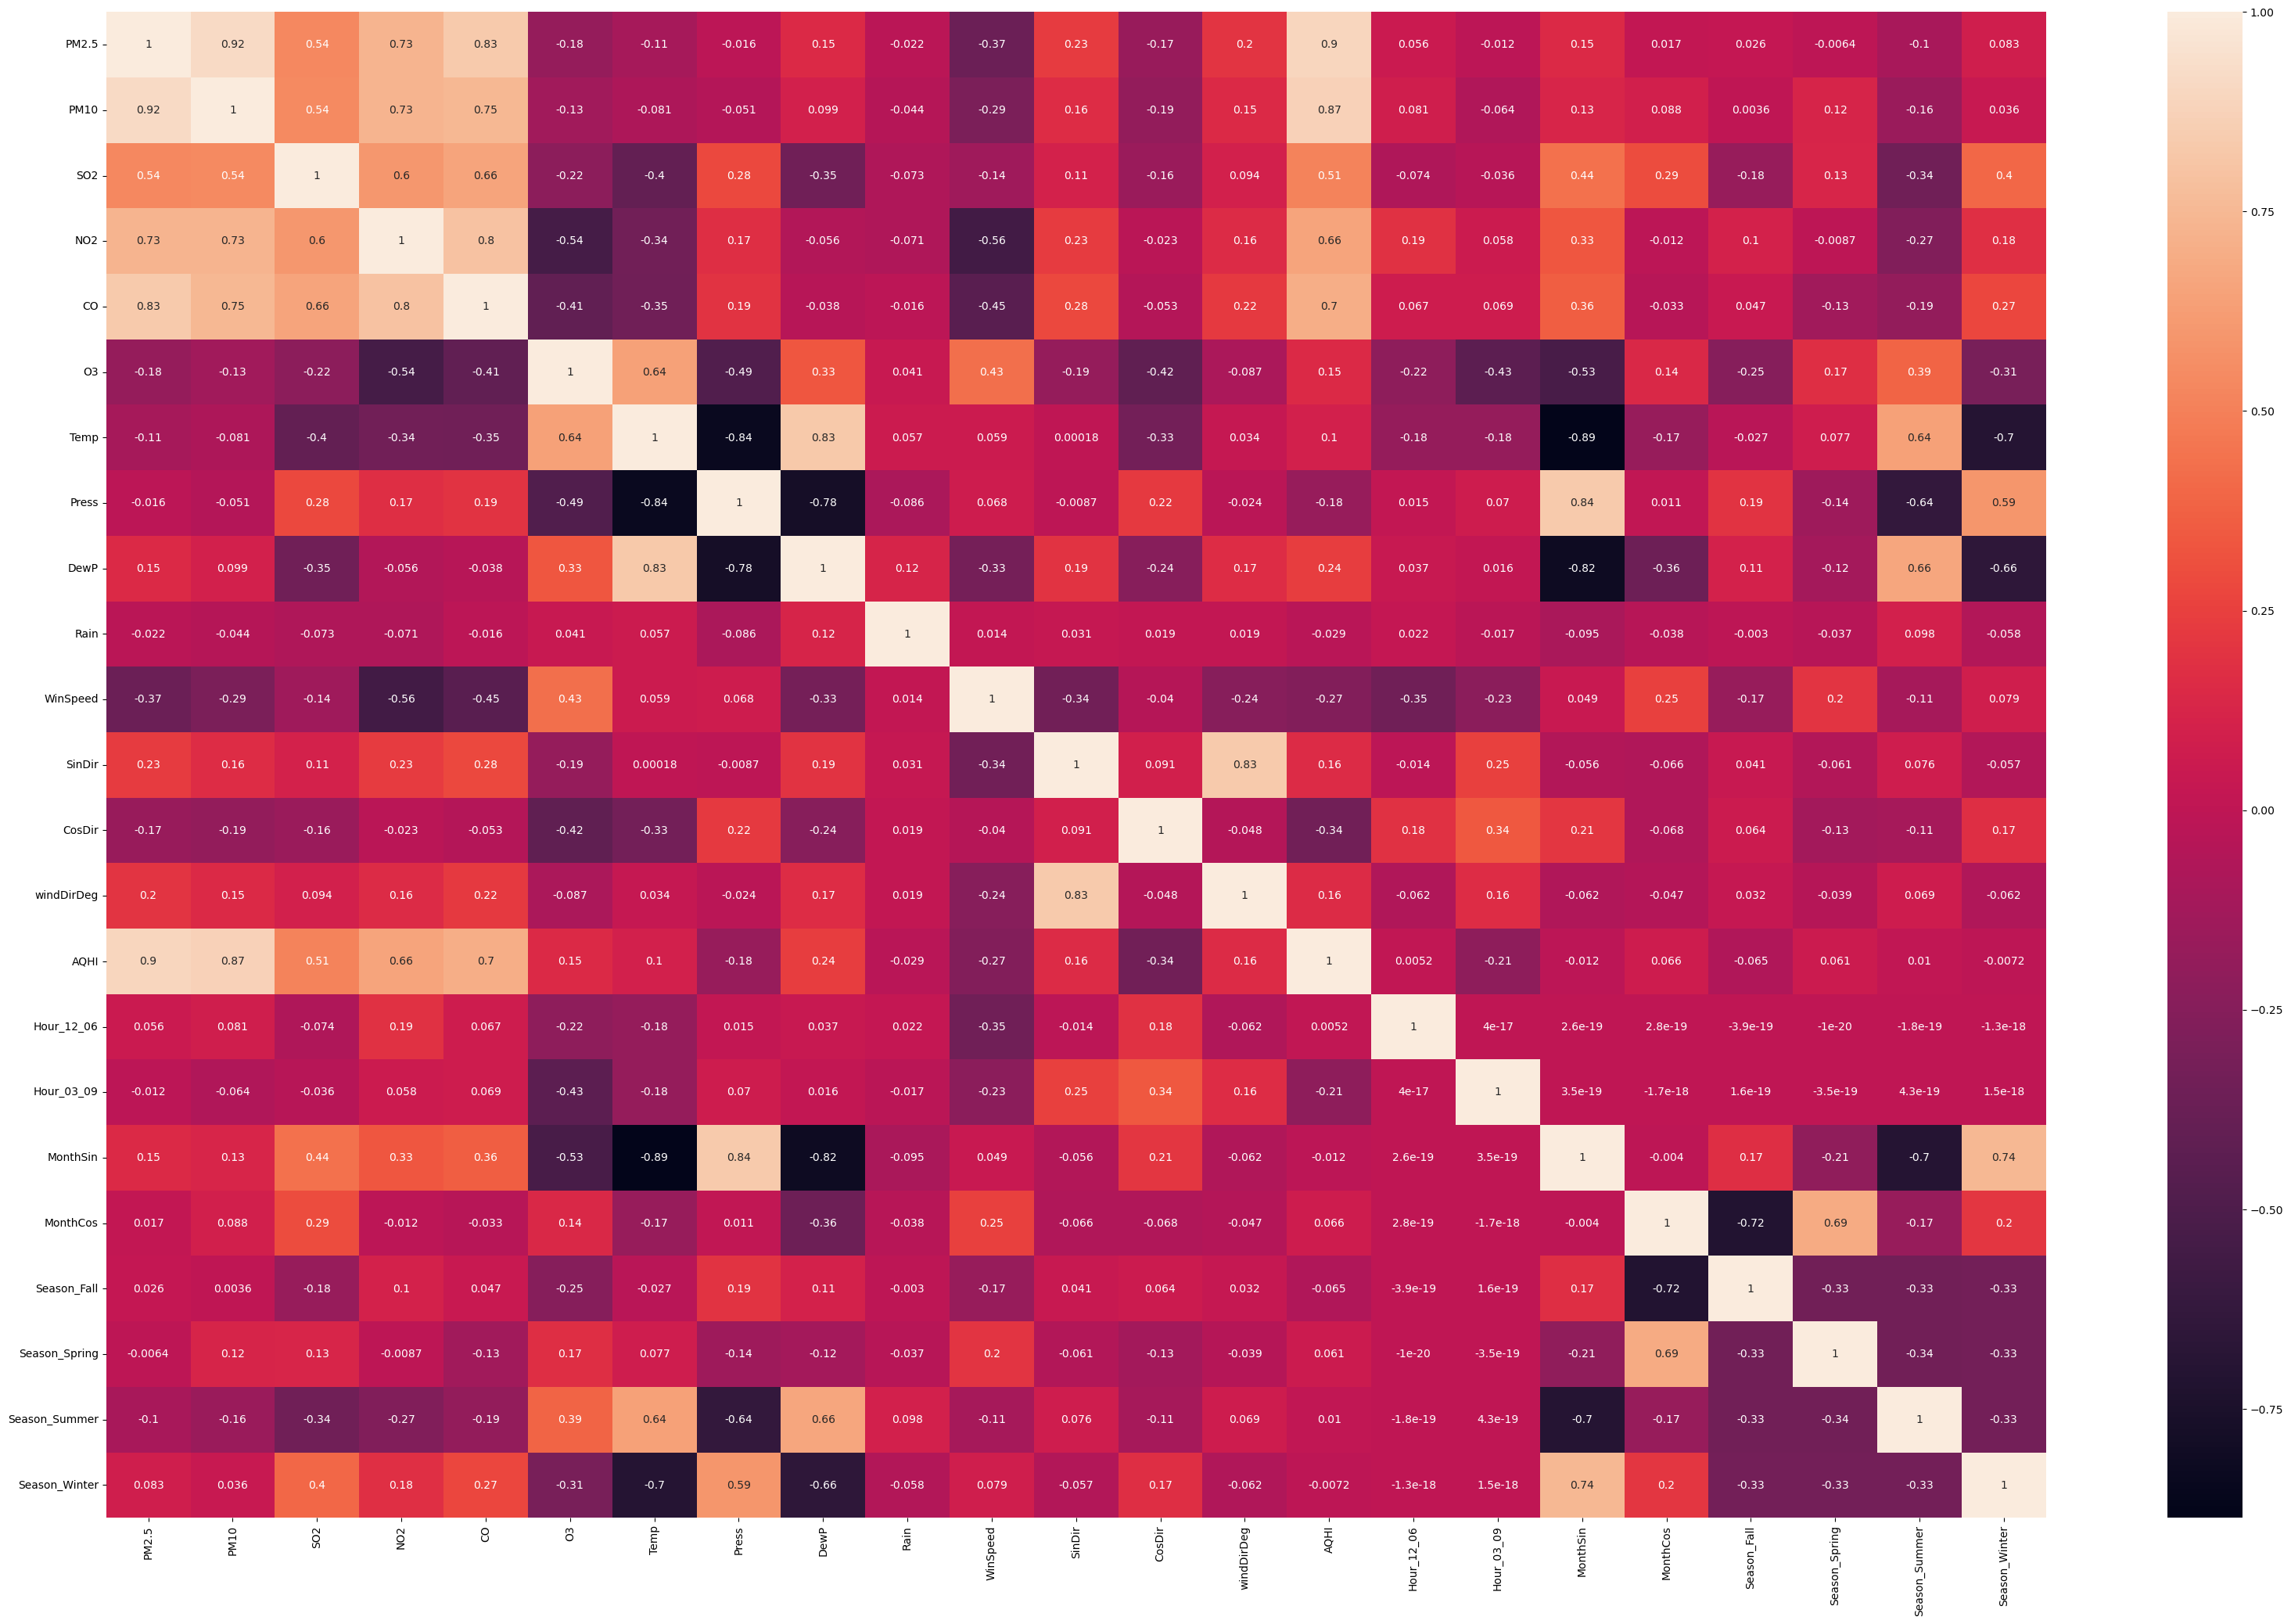

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 25))
p = sns.heatmap(beijing_correlated_df.corr(), annot=True)

# Create Features for Time Series Prediction

In [42]:
#create rolling features for selected features
def create_rolling_features(df, features, window_sizes = [6, 12, 24]):

    for feature in features:
        for window_size in window_sizes:
            df[f'{feature}_Mean_{window_size}h'] = df[feature].rolling(window=window_size).mean()
            df[f'{feature}_Std_{window_size}h'] = df[feature].rolling(window=window_size).std()

    return df

In [43]:
# create lag features
def create_lag_features(df, features, lag_hours = 24):

    for feature in features:
        for i in range(1, lag_hours+1):
            df[f'{feature}_Lag_{i}'] = df[feature].shift(i)

    return df

In [44]:
# create past features
def create_past_features(df, features, days = [1,2,3,7]):

    for feature in features:
        for day in days:
            df[f'{feature}_{day}day_ago'] = df[feature].shift(24*day)

    return df

In [45]:
#Define target
def target_definition(df, features, forecast_hours = [1, 2, 3]):

    """
    Target Definition, code by Chinedu Ifediorah
    Define target for the time series data

    :param dataframe df: Data frame to define target
    :param int forecast_hours: Define the number of hours to shift for forecasting

    :return: the new data frame with predictors
    :rtype: dataframe
    """

    # Shift the power consumption data by the forecast horizon to create the new target variable
    for feature in features:
        for fh in forecast_hours:
            df[f'Target_{feature}_{fh}h'] = df[feature].shift(-fh)

    return df

In [46]:
time_series_df = beijing_correlated_df.copy()

In [47]:
#create rolling features
time_series_df = create_rolling_features(time_series_df, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'AQHI'], [6, 12, 24])
time_series_df.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP',
       'Rain', 'WinSpeed', 'SinDir', 'CosDir', 'windDirDeg', 'AQHI',
       'Hour_12_06', 'Hour_03_09', 'MonthSin', 'MonthCos', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'PM2.5_Mean_6h',
       'PM2.5_Std_6h', 'PM2.5_Mean_12h', 'PM2.5_Std_12h', 'PM2.5_Mean_24h',
       'PM2.5_Std_24h', 'PM10_Mean_6h', 'PM10_Std_6h', 'PM10_Mean_12h',
       'PM10_Std_12h', 'PM10_Mean_24h', 'PM10_Std_24h', 'SO2_Mean_6h',
       'SO2_Std_6h', 'SO2_Mean_12h', 'SO2_Std_12h', 'SO2_Mean_24h',
       'SO2_Std_24h', 'NO2_Mean_6h', 'NO2_Std_6h', 'NO2_Mean_12h',
       'NO2_Std_12h', 'NO2_Mean_24h', 'NO2_Std_24h', 'CO_Mean_6h', 'CO_Std_6h',
       'CO_Mean_12h', 'CO_Std_12h', 'CO_Mean_24h', 'CO_Std_24h', 'O3_Mean_6h',
       'O3_Std_6h', 'O3_Mean_12h', 'O3_Std_12h', 'O3_Mean_24h', 'O3_Std_24h',
       'Temp_Mean_6h', 'Temp_Std_6h', 'Temp_Mean_12h', 'Temp_Std_12h',
       'Temp_Mean_24h', 'Temp_Std_24h', 'Pres

In [48]:
#create target to be predicted
time_series_df = target_definition(time_series_df, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQHI'], [1, 2, 3, 8, 24])
time_series_df.columns

/tmp/ipykernel_4563/586985273.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Target_{feature}_{fh}h'] = df[feature].shift(-fh)
/tmp/ipykernel_4563/586985273.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Target_{feature}_{fh}h'] = df[feature].shift(-fh)
/tmp/ipykernel_4563/586985273.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP',
       'Rain',
       ...
       'Target_O3_1h', 'Target_O3_2h', 'Target_O3_3h', 'Target_O3_8h',
       'Target_O3_24h', 'Target_AQHI_1h', 'Target_AQHI_2h', 'Target_AQHI_3h',
       'Target_AQHI_8h', 'Target_AQHI_24h'],
      dtype='object', length=124)

In [49]:
#create lag features
time_series_df = create_lag_features(time_series_df, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQHI'], 24)
time_series_df.shape

/tmp/ipykernel_4563/1902971578.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_Lag_{i}'] = df[feature].shift(i)
/tmp/ipykernel_4563/1902971578.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_Lag_{i}'] = df[feature].shift(i)
/tmp/ipykernel_4563/1902971578.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

(35064, 292)

In [50]:
#create past features
time_series_df = create_past_features(time_series_df, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQHI'], [1,2,3,7])
time_series_df.shape

/tmp/ipykernel_4563/4148826501.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_{day}day_ago'] = df[feature].shift(24*day)
/tmp/ipykernel_4563/4148826501.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_{day}day_ago'] = df[feature].shift(24*day)
/tmp/ipykernel_4563/4148826501.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

(35064, 320)

In [51]:
time_series_df_added = time_series_df.copy()

In [52]:
time_series_df_added.dropna(inplace=True)
time_series_df_added.shape

(34872, 320)

# Drop Targets

In [53]:
time_series_df_added = time_series_df_added.drop(columns=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQHI'])
time_series_df_added.shape

(34872, 313)

In [54]:
#Define target
def target_label_definition(features, forecast_hours = [1, 2, 3, 8, 24]):


    labels = []

    for feature in features:
        for fh in forecast_hours:
            labels.append(f'Target_{feature}_{fh}h')

    return labels

target_labels = target_label_definition(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQHI'])
target_labels

['Target_PM2.5_1h',
 'Target_PM2.5_2h',
 'Target_PM2.5_3h',
 'Target_PM2.5_8h',
 'Target_PM2.5_24h',
 'Target_PM10_1h',
 'Target_PM10_2h',
 'Target_PM10_3h',
 'Target_PM10_8h',
 'Target_PM10_24h',
 'Target_SO2_1h',
 'Target_SO2_2h',
 'Target_SO2_3h',
 'Target_SO2_8h',
 'Target_SO2_24h',
 'Target_NO2_1h',
 'Target_NO2_2h',
 'Target_NO2_3h',
 'Target_NO2_8h',
 'Target_NO2_24h',
 'Target_CO_1h',
 'Target_CO_2h',
 'Target_CO_3h',
 'Target_CO_8h',
 'Target_CO_24h',
 'Target_O3_1h',
 'Target_O3_2h',
 'Target_O3_3h',
 'Target_O3_8h',
 'Target_O3_24h',
 'Target_AQHI_1h',
 'Target_AQHI_2h',
 'Target_AQHI_3h',
 'Target_AQHI_8h',
 'Target_AQHI_24h']

In [55]:
# Create a new DataFrame with selected columns
df_target = time_series_df_added[target_labels].copy()

# Remove the selected columns from the original DataFrame
df_features = time_series_df_added.drop(columns=target_labels)

print('df_features >> ', df_features.shape)
print('df_target >> ', df_target.shape)

df_features >>  (34872, 278)
df_target >>  (34872, 35)


# Train Test Split

In [56]:
def train_test_split_data(df_features, df_target, train_start_date = None, train_end_date = None, test_start_date = None, test_end_date = None ):


    # Specify the start and end dates for training and test sets
    if train_start_date is None:
          train_start_date = '2013-01-01'
    if train_end_date is None:
          train_end_date = '2016-12-31'
    if test_start_date is None:
          test_start_date = '2017-01-01'
    if test_end_date is None:
          test_end_date = '2017-12-31'

    # Create training and test sets based on the specified dates
    X_train = df_features.loc[train_start_date:train_end_date]
    Y_train = df_target.loc[train_start_date:train_end_date]
    X_test = df_features.loc[test_start_date:test_end_date]
    Y_test = df_target.loc[test_start_date:test_end_date]


    return X_train, Y_train, X_test, Y_test


#TASK 3 STEP 2 and 3
X_train, Y_train, X_test, Y_test = train_test_split_data(df_features, df_target)

# Display the shapes of the feature and target variables
print("Training features shape:", X_train.shape)
print("Training target shape:", Y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", Y_test.shape)

Training features shape: (33480, 278)
Training target shape: (33480, 35)
Test features shape: (1392, 278)
Test target shape: (1392, 35)


In [57]:
X_train.to_csv('Beijing_simple_model_xtrain.csv', index=False)

In [58]:
Y_train.to_csv('Beijing_simple_model_ytrain.csv', index=False)

In [59]:
X_test.to_csv('Beijing_simple_model_xtest.csv', index=False)

In [60]:
Y_test.to_csv('Beijing_simple_model_ytest.csv', index=False)

# Simple Regression Models

## Compute Model Metrics

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#function to evaluate the model
def model_evaluation(y_test: np.ndarray, y_pred: np.ndarray):
    """
    Model Evaluation, code by Chinedu Ifediorah
    Compute the Mean Absolute Error, Mean Square Error and Mean Directional Accuracy

    :param np.ndarray y_test: The array with the actual values to be predicted
    :param np.ndarray y_pred: The array with the forecasted values - must
       align with the actual values
    :return: Mean Absolute Error, Mean Squared Error, Mean Directional Accuracy
    :rtype: tuple of floats
    """

    # Compute Mean Absolute Error (MAE)
    mae_error = mean_absolute_error(y_test, y_pred)

    # Compute Mean Squared Error (MSE)
    mse_error = mean_squared_error(y_test, y_pred)

    return mae_error, mse_error

In [62]:
def plot_response(y_pred, y_test):

    x_values = np.arange(len(y_test))

    plt.figure(figsize=(12, 6))

    # Plotting y_test
    plt.plot(x_values, y_test, label='y_test')

    # Plotting y_pred on top of y_test
    plt.plot(x_values, y_pred, label='y_pred', linestyle='--')

    # Adding labels and legend
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()

    # Showing the plot
    plt.show()

## Build Model

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import math


#function for simple linear regression
def linear_regression_model(X_train, y_train, X_test, y_test):

    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the linear regression model
    linear_regression_model = LinearRegression()

    # Train the model on the training data
    linear_regression_model.fit(X_train_scaled, y_train)

    # Generate predictions on the test dataset
    pred = linear_regression_model.predict(X_test_scaled)

    #Evaluate the model
    mae, mse = model_evaluation(y_test.values, pred)

    return linear_regression_model, pred, mae, mse

In [64]:

linear_model, linear_model_pred, linear_model_mae, linear_model_mse = linear_regression_model(
    X_train,
    Y_train['Target_AQHI_1h'],
    X_test,
    Y_test['Target_AQHI_1h']
  )

# Print the computed metrics
print("Mean Absolute Error (MAE):", linear_model_mae)
print("Mean Squared Error (MSE):", linear_model_mse)
print("Root Mean Squared Error (RMSE):", math.sqrt(linear_model_mse))


Mean Absolute Error (MAE): 0.32855652816485303
Mean Squared Error (MSE): 0.2963213204854104
Root Mean Squared Error (RMSE): 0.5443540396519625


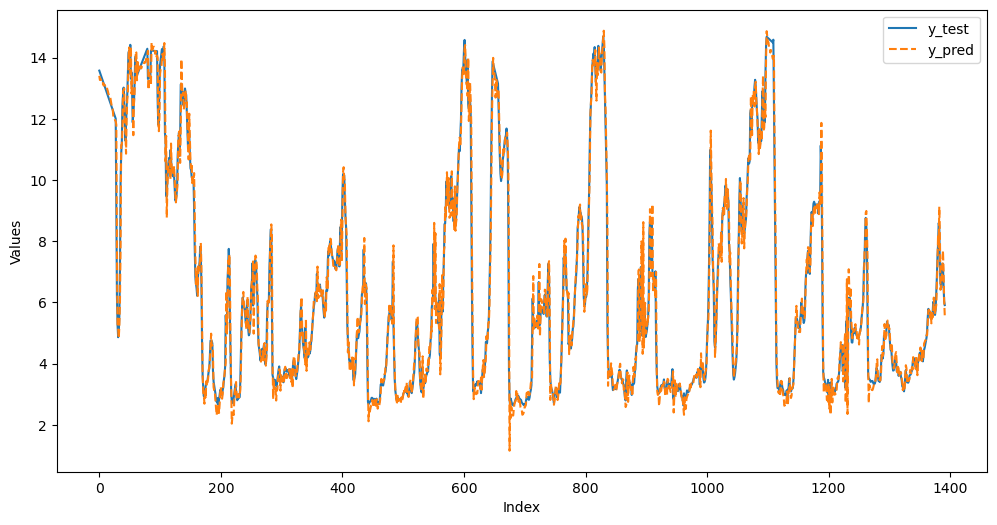

In [66]:
plot_response(np.array(linear_model_pred), np.array(Y_test['Target_AQHI_1h']))

### Try lasso regression with grid search and blocked cross validation

In [69]:
#Performing lasso regularization to see if some predictors would go to zero.
#Also grid search on the lasso regularization term to getv the best lasso term

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

#function for simple lasso regression
def lasso_regression_model(X_train, y_train, X_test, y_test):

    # Lasso regression with grid search to get the perfect alpha

    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    #Create a Lasso regression model
    lasso_model = Lasso()

    # Define a grid of hyperparameters to search over
    param_grid = {'alpha': [1, 10, 50, 100, 500, 1000]}

    # Perform grid search with cross-validation

    # Perform time-aware cross-validation with grid search
    tscv = TimeSeriesSplit(n_splits=5)
    grid_search = GridSearchCV(lasso_model, param_grid, cv=tscv)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best hyperparameters
    best_alpha = grid_search.best_params_['alpha']

    # Create a new Lasso model with the best alpha
    best_lasso_model = Lasso(alpha=best_alpha)

    # Fit the model to the training data
    best_lasso_model.fit(X_train_scaled, y_train)

    # Evaluate the model
    train_score = best_lasso_model.score(X_train_scaled, y_train)
    test_score = best_lasso_model.score(X_test_scaled, y_test)

    lasso_coefficients = best_lasso_model.coef_

    # Generate predictions on the test dataset
    pred = best_lasso_model.predict(X_test_scaled)

    #Evaluate the model
    mae, mse = model_evaluation(y_test.values, pred)

    return lasso_coefficients, train_score, test_score, pred, mae, mse

In [70]:
lasso_coefficients, lasso_train_score, lasso_test_score, lasso_pred, lasso_mae, lasso_mse = lasso_regression_model(
    X_train,
    Y_train['Target_AQHI_1h'],
    X_test,
    Y_test['Target_AQHI_1h']
  )

# Print the computed metrics
print("Train Score:", lasso_train_score)
print("Test Score:", lasso_test_score)
print("Mean Absolute Error (MAE):", lasso_mae)
print("Mean Squared Error (MSE):", lasso_mse)

Train Score: 0.7950034033935545
Test Score: 0.8088535255606768
Mean Absolute Error (MAE): 1.281386839779648
Mean Squared Error (MSE): 2.421287540638844


Got worse result with lasso

### Perform Backward Elimination to get pick selected features

In [71]:
!pip3 install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [72]:
# Assuming X_combined_df is your DataFrame
lasso_coefficients, lasso_train_score, lasso_test_score, lasso_pred, lasso_mae, lasso_mse = lasso_regression_model(
    X_train,
    Y_train['Target_AQHI_1h'],
    X_test,
    Y_test['Target_AQHI_1h']
  )

# Print the computed metrics
print("Train Score:", lasso_train_score)
print("Test Score:", lasso_test_score)
print("Mean Absolute Error (MAE):", lasso_mae)
print("Mean Squared Error (MSE):", lasso_mse)

/tmp/ipykernel_4563/1513649615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[boolean_columns] = X_train[boolean_columns].astype(int)
/tmp/ipykernel_4563/1513649615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[boolean_columns] = X_test[boolean_columns].astype(int)


In [73]:
# Concatenate X_train and X_test along axis 0 (rows)
X_combined_df = pd.concat([X_train, X_test], axis=0)
Y_combined_df = pd.concat([Y_train, Y_test], axis=0)
print(X_combined_df.shape)
print(Y_combined_df.shape)

(34872, 278)
(34872, 35)


In [74]:
#Backward Elimination. Evaluation is done based on the significance value (p-value)
import statsmodels.api as sm

def backward_elimination(X, y, significance_level=0.05):
    num_features = X.shape[1]

    print('num_features >> ', num_features, type(y), type(X))
    # X = sm.add_constant(X)
    for i in range(num_features):
        
        # Fit the model
        model = sm.OLS(y, X).fit()
        # Get p-values for each feature
        print(i, " 2>> ")
        p_values = model.pvalues
        print(i, " >> ")
        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        print('max_p_value >> ', max_p_value)
        if max_p_value > significance_level:
            # Remove the feature with the highest p-value
            max_p_value_index = p_values.argmax()
            X = X.drop(columns=X.columns[max_p_value_index])
        else:
            # If all p-values are below the significance level, break the loop
            break
    return X


# Convert DataFrame to NumPy arrays
X_array = np.asarray(X_combined_df)
y_array = np.asarray(Y_combined_df['Target_AQHI_1h'])

# Perform backward elimination using NumPy arrays
X_selected = backward_elimination(X_combined_df.copy(), Y_combined_df['Target_AQHI_1h'].copy())

# X_selected = backward_elimination(X_combined_df, Y_combined_df['Target_PM2.5_4h'])

# Print the selected features
print("Selected Features after Backward Elimination:")
print(X_selected.columns)

num_features >>  278 <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>
0  2>> 
0  >> 
max_p_value >>  0.9897830783681296
1  2>> 
1  >> 
max_p_value >>  0.9864408062131742
2  2>> 
2  >> 
max_p_value >>  0.9864408057965133
3  2>> 
3  >> 
max_p_value >>  0.9656732522981776
4  2>> 
4  >> 
max_p_value >>  0.951602514080615
5  2>> 
5  >> 
max_p_value >>  0.9488442315346683
6  2>> 
6  >> 
max_p_value >>  0.9331497252512586
7  2>> 
7  >> 
max_p_value >>  0.9206858195090268
8  2>> 
8  >> 
max_p_value >>  0.9179403853316372
9  2>> 
9  >> 
max_p_value >>  0.9147406782535652
10  2>> 
10  >> 
max_p_value >>  0.9155942861762719
11  2>> 
11  >> 
max_p_value >>  0.9618473027693915
12  2>> 
12  >> 
max_p_value >>  0.9019086888156199
13  2>> 
13  >> 
max_p_value >>  0.8896036285482991
14  2>> 
14  >> 
max_p_value >>  0.8866610141088938
15  2>> 
15  >> 
max_p_value >>  0.9514535238342324
16  2>> 
16  >> 
max_p_value >>  0.9341041399310557
17  2>> 
17  >> 
max_p_value >>  0.8669007

In [75]:
X_selected.columns

Index(['Temp', 'Press', 'DewP', 'Rain', 'WinSpeed', 'SinDir', 'CosDir',
       'Hour_12_06', 'Hour_03_09', 'MonthSin',
       ...
       'AQHI_Lag_14', 'AQHI_Lag_24', 'PM2.5_1day_ago', 'PM2.5_3day_ago',
       'PM10_1day_ago', 'NO2_1day_ago', 'O3_2day_ago', 'O3_3day_ago',
       'AQHI_1day_ago', 'AQHI_3day_ago'],
      dtype='object', length=111)

In [76]:
X_selected_columns = list(X_selected.columns)
type(X_selected_columns)

list

In [77]:
linear_model_reduced, linear_model_reduced_pred, linear_model_reduced_mae, linear_model_reduced_mse = linear_regression_model(
    X_train.loc[:, X_selected_columns],
    Y_train['Target_AQHI_1h'],
    X_test.loc[:, X_selected_columns],
    Y_test['Target_AQHI_1h']
  )

# Print the computed metrics
print("Mean Absolute Error (MAE):", linear_model_reduced_mae)
print("Mean Squared Error (MSE):", linear_model_reduced_mse)
print("Root Mean Squared Error (RMSE):", math.sqrt(linear_model_reduced_mse))

Mean Absolute Error (MAE): 0.32617798374530177
Mean Squared Error (MSE): 0.29211733017517616
Root Mean Squared Error (RMSE): 0.5404787971559811


## Give a better Outcome

In [78]:
X_train.loc[:, X_selected_columns].shape

(33480, 111)

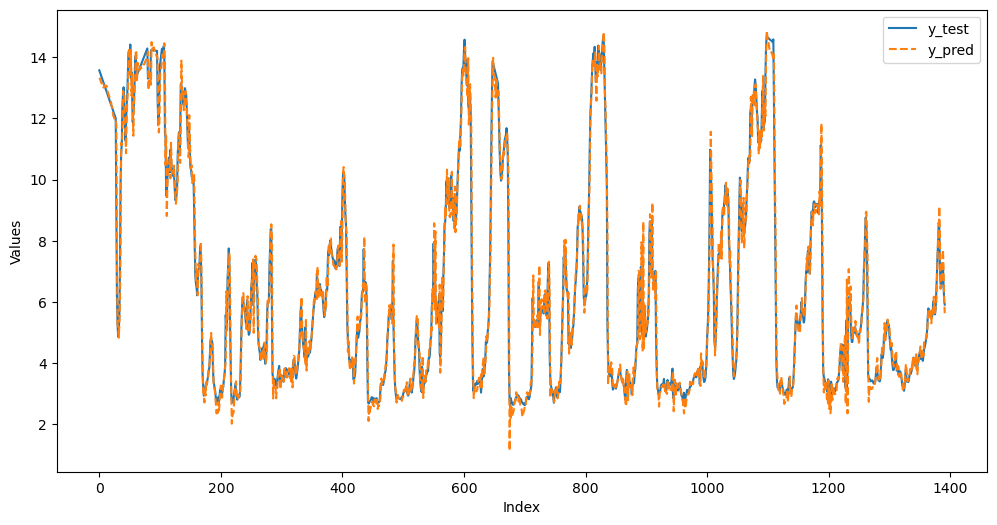

In [79]:
plot_response(np.array(linear_model_reduced_pred), np.array(Y_test['Target_AQHI_1h']))

### Predict PM 2.5

In [80]:

linear_model2_5, linear_model_pred2_5, linear_model_mae2_5, linear_model_mse2_5 = linear_regression_model(
    X_train.loc[:, X_selected_columns],
    Y_train['Target_PM2.5_1h'],
    X_test.loc[:, X_selected_columns],
    Y_test['Target_PM2.5_1h']
  )

# Print the computed metrics
print("Mean Absolute Error (MAE):", linear_model_mae2_5)
print("Mean Squared Error (MSE):", linear_model_mse2_5)

Mean Absolute Error (MAE): 5.320444753900421
Mean Squared Error (MSE): 91.18183499231243


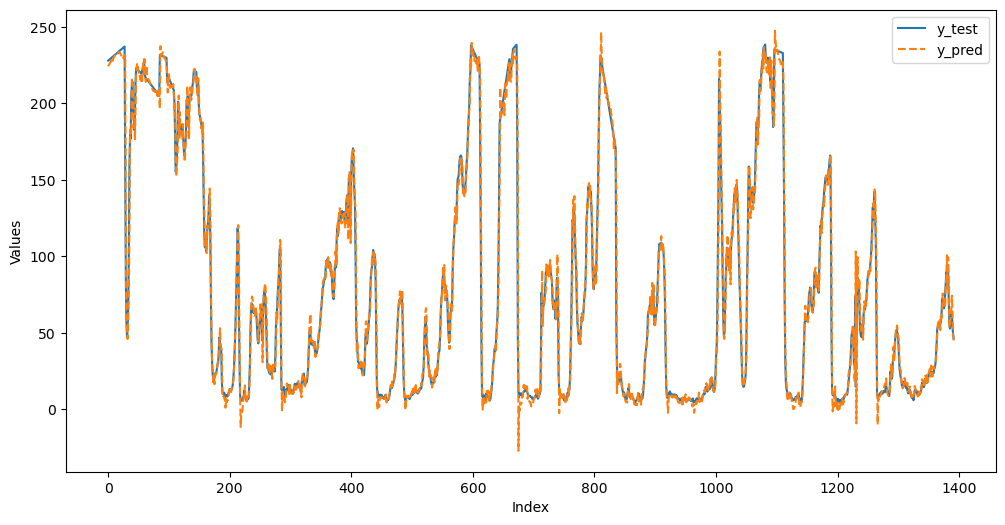

In [81]:
plot_response(np.array(linear_model_pred2_5), np.array(Y_test['Target_PM2.5_1h']))

## Predict 3 Hrs into the future

In [82]:
linear_model3, linear_model_pred3, linear_model_mae3, linear_model_mse3 = linear_regression_model(
    X_train.loc[:, X_selected_columns],
    Y_train['Target_AQHI_3h'],
    X_test.loc[:, X_selected_columns],
    Y_test['Target_AQHI_3h']
  )

print("Mean Absolute Error (MAE):", linear_model_mae3)
print("Mean Squared Error (MSE):", linear_model_mse3)
print("Root Mean Squared Error (RMSE):", math.sqrt(linear_model_mse3))

Mean Absolute Error (MAE): 0.7689313169332783
Mean Squared Error (MSE): 1.365301966169192
Root Mean Squared Error (RMSE): 1.1684613669990087


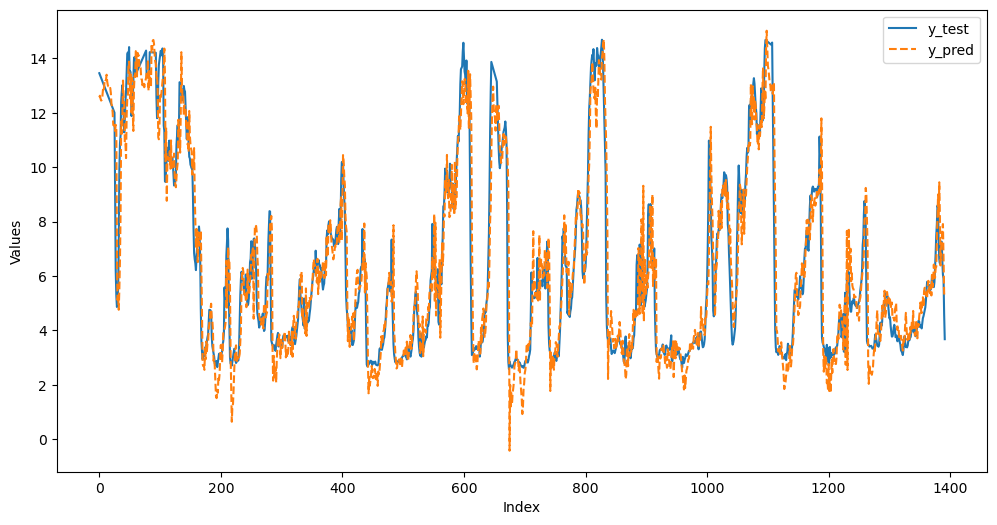

In [83]:
plot_response(np.array(linear_model_pred3), np.array(Y_test['Target_AQHI_3h']))

## Predict 8 hrs into the future

In [84]:
linear_model8, linear_model_pred8, linear_model_mae8, linear_model_mse8 = linear_regression_model(
    X_train.loc[:, X_selected_columns],
    Y_train['Target_AQHI_8h'],
    X_test.loc[:, X_selected_columns],
    Y_test['Target_AQHI_8h']
  )

# Print the computed metrics
print("Mean Absolute Error (MAE):", linear_model_mae8)
print("Mean Squared Error (MSE):", linear_model_mse8)
print("Root Mean Squared Error (RMSE):", math.sqrt(linear_model_mse8))

Mean Absolute Error (MAE): 1.4304546117898216
Mean Squared Error (MSE): 4.183144878544204
Root Mean Squared Error (RMSE): 2.0452737906070677


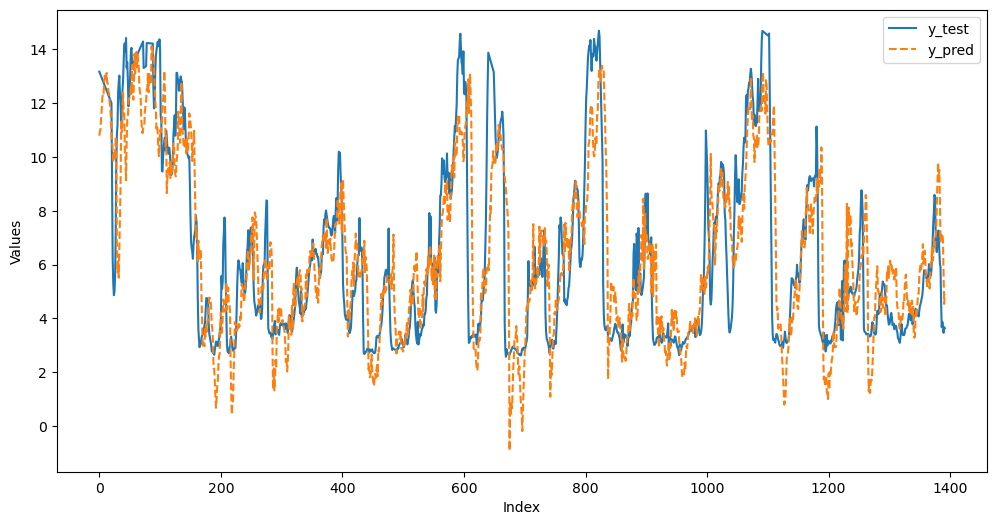

In [85]:
plot_response(np.array(linear_model_pred8), np.array(Y_test['Target_AQHI_8h']))

## Predict 24 hrs into the future

In [86]:
linear_model24, linear_model_pred24, linear_model_mae24, linear_model_mse24 = linear_regression_model(
    X_train.loc[:, X_selected_columns],
    Y_train['Target_AQHI_24h'],
    X_test.loc[:, X_selected_columns],
    Y_test['Target_AQHI_24h']
  )

# Print the computed metrics
print("Mean Absolute Error (MAE):", linear_model_mae24)
print("Mean Squared Error (MSE):", linear_model_mse24)
print("Root Mean Squared Error (RMSE):", math.sqrt(linear_model_mse24))

Mean Absolute Error (MAE): 2.279261329176749
Mean Squared Error (MSE): 8.335529537843486
Root Mean Squared Error (RMSE): 2.8871317146682944


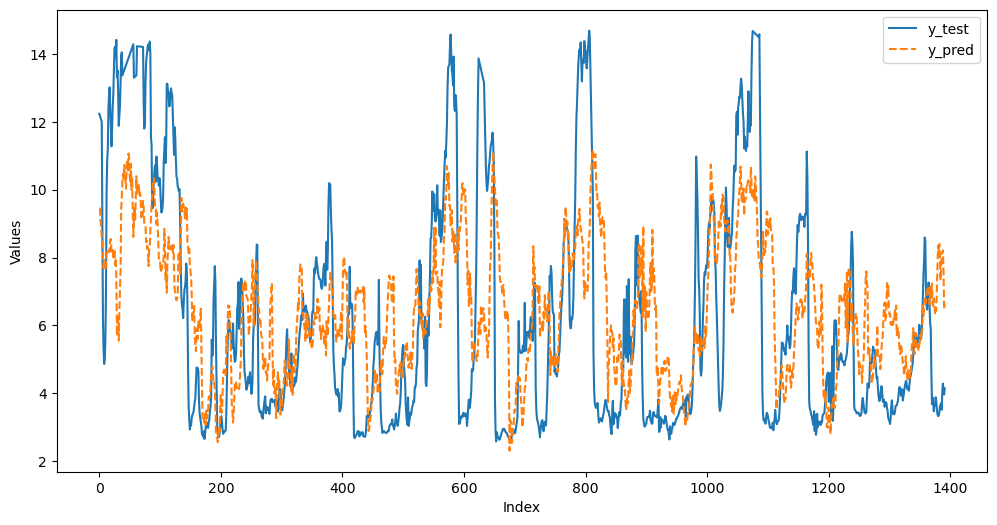

In [87]:
plot_response(np.array(linear_model_pred24), np.array(Y_test['Target_AQHI_24h']))

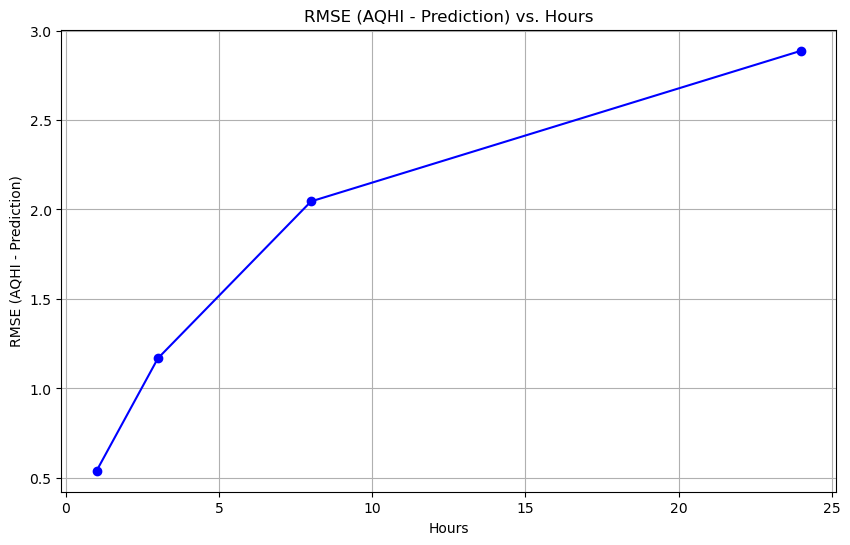

In [88]:
# Data
hours = [1, 3, 8, 24]
rmse = [0.540, 1.168, 2.045, 2.887]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hours, rmse, marker='o', linestyle='-', color='b')
plt.title('RMSE (AQHI - Prediction) vs. Hours')
plt.xlabel('Hours')
plt.ylabel('RMSE (AQHI - Prediction)')
plt.grid(True)
plt.show()

### Perform PCA to see how many components can explain the variance

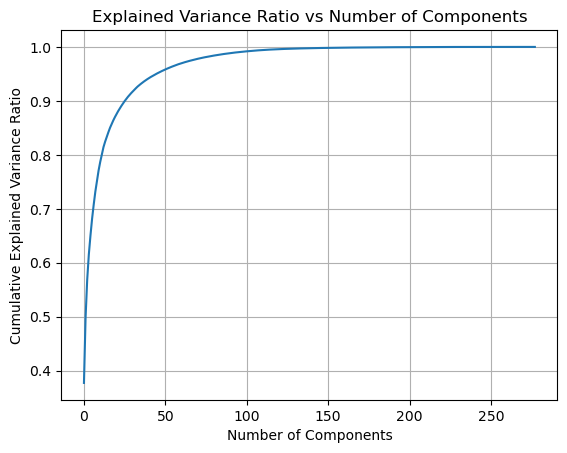

In [89]:
#PCA variance plot
from sklearn.decomposition import PCA
import numpy as np

X_train_pca = X_train.copy()


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)

# Create a PCA object
pca = PCA()

# Fit PCA to the scaled training data
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

In [91]:
#scale and perform pca on the data with 20 component
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create a PCA object
pca = PCA(n_components=100)

# Fit PCA to the scaled data
X_train_pca = pca.fit_transform(X_train_scaled)

# Convert the transformed data into a DataFrame for analysis or further processing
X_train_pca_df = pd.DataFrame(data=X_train_pca)

# Print the explained variance ratio
# print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Standardize the test features using the same scaler fitted to the training data
X_test_scaled = scaler.transform(X_test)

# Transform the test features using the fitted PCA transformation
X_test_pca = pca.transform(X_test_scaled)

X_test_pca_df = pd.DataFrame(data=X_test_pca)


pca_model, pca_pred, pca_mae, pca_mse = linear_regression_model(
    X_train_pca_df,
    Y_train['Target_AQHI_1h'],
    X_test_pca_df,
    Y_test['Target_AQHI_1h']
  )

# Print the computed metrics
print("Mean Absolute Error (MAE):", pca_mae)
print("Mean Squared Error (MSE):", pca_mse)
print("Root Mean Squared Error (RMSE):", math.sqrt(pca_mse))

Mean Absolute Error (MAE): 0.6403980149100954
Mean Squared Error (MSE): 0.8971525194295032
Root Mean Squared Error (RMSE): 0.9471813550896698


### PCA reduction also produce worse result. Just like lasso

# Lets Try more complex models

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

def grid_search_random_forest(X_train, y_train):


    mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

    rf_regressor = RandomForestRegressor(random_state=42)

    rf_grid_param = {
        'n_estimators': [100, 200],
        'max_depth': [10, 15, 20],
    }

    tscv = TimeSeriesSplit(n_splits=5)

    # Grid search for Random Forest
    rf_grid_search = GridSearchCV(estimator=rf_regressor,
                                    param_grid=rf_grid_param,
                                    scoring=mape_scorer,
                                    cv=tscv,
                                    error_score='raise',
                                    n_jobs=-1)
    
    rf_grid_search.fit(X_train, y_train)

    # Get best parameters
    best_rf_params = rf_grid_search.best_params_


    return best_rf_params

In [79]:
# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

best_rf_params = grid_search_random_forest(X_train_scaled, Y_train['Target_AQHI_1h'])



print("best_rf_params >> ", best_rf_params)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy

best_rf_params >>  {'max_depth': 20, 'n_estimators': 200}


In [82]:

def random_forest_model(X_train, y_train, X_test, y_test, max_depth = 20, n_estimators = 200):

    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the random forest model
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Generate predictions on the test dataset
    pred = model.predict(X_test_scaled)

    print('pred.shape >> ', pred.shape)
    print('y_test.values >> ', y_test.values.shape)

    #Evaluate the model
    mae, mse = model_evaluation(y_test.values, pred)

    return model, pred, mae, mse

In [83]:
rf_model, pred, mae, mse = random_forest_model(
    X_train,
    Y_train['Target_AQHI_1h'],
    X_test,
    Y_test['Target_AQHI_1h']
  )

# Print the computed metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

pred.shape >>  (1413,)
y_test.values >>  (1413,)
Mean Absolute Error (MAE): 0.5009871499358178
Mean Squared Error (MSE): 0.6784320215872494


### Linear Regression Performs Better

## XGBOOST

In [84]:
import xgboost as xgb

def xgboost_model(X_train, y_train, X_test, y_test, max_depth=5, n_estimators=500):
    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the XGBoost model
    model = xgb.XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=42)

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Generate predictions on the test dataset
    pred = model.predict(X_test_scaled)

    print('pred.shape >> ', pred.shape)
    print('y_test.values >> ', y_test.values.shape)

    # Evaluate the model
    mae, mse = model_evaluation(y_test.values, pred)

    return model, pred, mae, mse


In [85]:
xgboost, xgboost_pred, xgboost_mae, xgboost_mse = xgboost_model(
    X_train,
    Y_train['Target_AQHI_1h'],
    X_test,
    Y_test['Target_AQHI_1h']
  )

# Print the computed metrics
print("Mean Absolute Error (MAE):", xgboost_mae)
print("Mean Squared Error (MSE):", xgboost_mse)

pred.shape >>  (1413,)
y_test.values >>  (1413,)
Mean Absolute Error (MAE): 0.4874225649852332
Mean Squared Error (MSE): 0.5749465022892092


### Linear Regression Performs Better

## SVM

In [125]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

def svm_regression_model(X_train, y_train, X_test, y_test, C=1.0, kernel='rbf'):
    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the SVR model
    model = SVR(C=C, kernel=kernel)

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Generate predictions on the test dataset
    pred = model.predict(X_test_scaled)

    print('pred.shape >> ', pred.shape)
    print('y_test.values >> ', y_test.values.shape)

    # Evaluate the model (you'll need to define your own evaluation function for regression)
    mae, mse = model_evaluation(y_test.values, pred)

    return model, pred, mae, mse


In [126]:
svm, svm_pred, svm_mae, svm_mse = svm_regression_model(
    X_train,
    Y_train['Target_AQHI_1h'],
    X_test,
    Y_test['Target_AQHI_1h']
  )

# Print the computed metrics
print("Mean Absolute Error (MAE):", svm_mae)
print("Mean Squared Error (MSE):", svm_mse)

pred.shape >>  (1413,)
y_test.values >>  (1413,)
Mean Absolute Error (MAE): 0.5065547484644681
Mean Squared Error (MSE): 0.6517460759309119


### Linear Regression Performs Better